<H1>Linear regression</H1>

In [1]:
%pylab inline
from numpy import poly1d, polyfit

Populating the interactive namespace from numpy and matplotlib


<H2> Fitting polynomial functions </H2> 

We want to fit some data to the following linear function : 

$$f(m,a;x) = mx + a,$$  


where $x$ is the independent variable, $m$ is the slope of the function, and $a$ is the y-intercept.

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


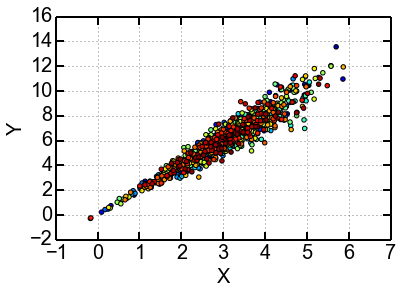

In [2]:
# generate some data
np.random.seed(1000)
mysize = 1000
xdata = np.random.normal(3.0, 1.0, mysize)
m = 2.0 + np.random.normal(0,.2,mysize)
a = 0.05 + np.random.normal(0, .01, size=mysize)
ydata = m*xdata + a
plt.scatter(xdata,ydata, c=xrange(mysize))
plt.xlabel('X'), plt.ylabel('Y');

<H2>Creating a polynomial function</H2>

We want to fit the data to the function described above. 
This is a 1-dimensional polynomial function of degree 1. This kind of functions are easilly handled in NumPy with the poly1d class.
To create a poloynomial function we simply enter the polynomial coefficients in decrement manner in an array. 
For example to create the following polynomial:

$f(x) = x^2 + 2x + 3$

In [3]:
mypoly = np.poly1d([1,2,3])
print(mypoly)

   2
1 x + 2 x + 3


<H2>Fitting the data</H2>

We need to fit our function to get the parameters; the y intercept and the slope. 
Remember, the slope is the correlation between the two variables times the standard deviation in Y. The intercept is the mean of Y minus the slope times the mean of X.

In [4]:
m, a = np.polyfit(xdata,ydata,1) # polynomial degree one
print("m=%f, a=%f" % (m,a))

m=1.977428, a=0.109988


We can create  polynomial function with the parameters obtained with this fitting, to plot it with the original data

In [5]:
f = poly1d(np.polyfit(xdata,ydata,1)) # 1 degree polynomial function

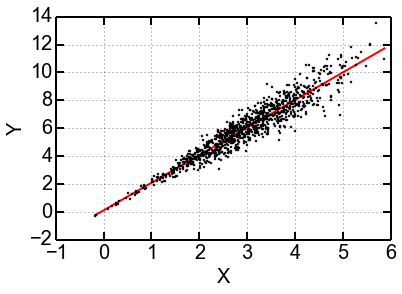

In [6]:
t = np.linspace(start = np.min(xdata), stop = np.max(xdata), num = 100)
plt.plot(t, f(t), 'r-', lw=2);
plt.plot(xdata, ydata, 'ko', markersize=2);
plt.xlabel('X'); plt.ylabel('Y');

In [7]:
# we can do it easily with scipy
from scipy.stats import linregress

In [8]:
slope, intercept, rvalue, pvalue, stderr = linregress(xdata,ydata)
print(linregress(xdata,ydata))

(1.9774277406018239, 0.10998757412240678, 0.9508401887753134, 0.0, 0.020386551674092365)


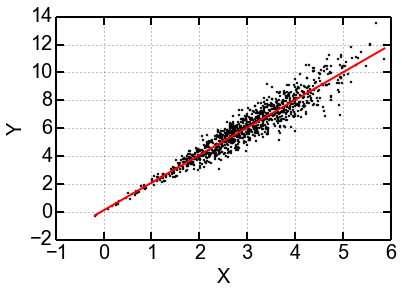

In [9]:
# lets plot all together
f = lambda x: slope*x + intercept

x = np.linspace(np.min(xdata), np.max(xdata), 100)
plt.plot(xdata, ydata, 'ko', markersize=2);
plt.plot(x, f(x), 'red')
plt.xlabel('X'); plt.ylabel('Y');

<H2>R-squared (coefficient of determination)</H2>
<P>Indicates the proportion of the variance in the dependent variable that is predictable from the independent variable. It is therefore the fraction of total variation in Y that is captured by the model (linear). It ranges from 0 to 1 and is defined as:</P>

$$R^2 = 1 - \frac{\sum (x_i - f(x_i))^2}{\sum (x_i-\bar{x})^2}$$

where the numerator is the sum of squared errors between the data and the model, and the denominator is total sum of squares (proportional to the variance of the data).

In [10]:
print(rvalue**2)

0.90409706459


In [11]:
#Use sci-kitlearn to compute r2
from sklearn.metrics import r2_score

In [12]:
r2_score(ydata, f(xdata))

0.90409706459027228